<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Assignment/AIMLCEP_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solution to Assignment question (Q2-a)

In this session, we shall apply logistic regression and look at predictions using it.

In [125]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us load the Q2 Classification train data

In [126]:
spam_class_train_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_train.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none


In [127]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_train_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_train_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


We can now generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn

In [128]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_train_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [129]:
number_tf = gle.fit_transform(spam_class_train_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [130]:
spam_class_train_data['winner_tf'] = winner_tf
spam_class_train_data['number_tf'] = number_tf
spam_class_train_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big,0,0
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small,0,2
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small,0,2
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none,0,1
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,1.597,46,0,0,1,0,3,small,0,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0.333,13,0,0,0,0,0,big,0,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0.332,12,0,0,0,0,0,small,0,2
3134,1,0,1,0,0,0,0,2,yes,0,0,0,2.225,65,0,0,1,0,1,small,1,2


In [131]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_train_data_tf = spam_class_train_data.reindex(columns=column_names)
spam_class_train_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,0,11.370,202,1,0,0,0,0,big,0
1,0,0,1,0,0,0,0,0,no,0,0,0,0,10.504,202,1,0,0,0,1,small,2
2,0,0,1,0,0,0,0,0,no,0,0,0,0,13.256,255,1,0,0,0,48,small,2
3,0,0,1,0,0,0,0,0,no,0,0,0,2,1.231,29,0,0,0,0,1,none,1
4,0,0,1,0,0,0,0,0,no,0,0,0,2,1.091,25,0,0,0,0,1,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,0,1.597,46,0,0,1,0,3,small,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0,0.333,13,0,0,0,0,0,big,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0,0.332,12,0,0,0,0,0,small,2
3134,1,0,1,0,0,0,0,2,yes,1,0,0,0,2.225,65,0,0,1,0,1,small,2


In [132]:
#Lets Drop original column in dataframe
spam_class_train_data_tf= spam_class_train_data_tf.drop(['winner','number'], axis=1)
spam_class_train_data_tf


,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,1,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,1,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,1,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


Now Lets transform the test data

In [133]:
spam_class_test_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_test.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none


In [134]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_test_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_test_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


In [135]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_test_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [136]:
number_tf = gle.fit_transform(spam_class_test_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [137]:
spam_class_test_data['winner_tf'] = winner_tf
spam_class_test_data['number_tf'] = number_tf
spam_class_test_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small,0,2
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small,0,2
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none,0,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small,0,2
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,31.104,744,1,0,0,0,3,small,0,2
781,0,0,1,0,0,0,0,0,no,0,0,0,30.201,728,1,0,0,0,3,small,0,2
782,0,0,1,0,0,0,0,10,no,0,0,0,74.753,1953,1,0,0,0,27,small,0,2
783,0,0,1,0,0,0,0,25,no,0,0,0,16.863,570,1,0,0,0,3,small,0,2


In [138]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_test_data_tf = spam_class_test_data.reindex(columns=column_names)
spam_class_test_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,0,20.133,364,1,0,0,0,8,small,2
1,1,0,1,0,0,0,0,0,no,0,0,0,0,3.796,71,1,0,0,0,4,small,2
2,1,0,1,0,0,0,0,0,no,0,0,0,0,2.705,35,1,0,0,0,0,none,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0,0.537,22,0,0,0,0,3,small,2
4,1,0,1,0,0,0,0,0,no,0,0,0,0,4.174,2,0,0,0,0,0,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,0,31.104,744,1,0,0,0,3,small,2
781,0,0,1,0,0,0,0,0,no,0,0,0,0,30.201,728,1,0,0,0,3,small,2
782,0,0,1,0,0,0,0,10,no,0,0,0,0,74.753,1953,1,0,0,0,27,small,2
783,0,0,1,0,0,0,0,25,no,0,0,0,0,16.863,570,1,0,0,0,3,small,2


In [139]:
#Lets Drop original column in test dataframe
spam_class_test_data_tf = spam_class_test_data_tf.drop(['winner', 'number'], axis=1)
spam_class_test_data_tf

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


================================================================================

In [161]:
#Let us now compute beta_train 
n_train = len(spam_class_train_data_tf.index) #number of data points in the data set
print('number of data points in the train data set:',n_train)

#Let us now compute beta_train 
n_test = len(spam_class_test_data_tf.index) #number of data points in the data set
print('number of data points in the test data set:',n_test)




number of data points in the train data set: 3136
number of data points in the test data set: 785


,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1


In [164]:
#extract the predictor variable columns. We see that Lenght and width is the most significant attributes
X_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[1:20]]
y_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[0]]
X_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[1:20]]
y_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[0]]



We can further write $p(x)$ equivalently as:

$
p(x)=p(x;\beta_0,\beta_1) = \frac{1}{1+e^{-(\beta_0 + \beta_1^T x)}}, \text{where }\beta_1,x\in\mathbb{R}^2.
$

If we denote $p(x)$ simply as $p$ and if we have the notations $\mathbf{x}=\begin{bmatrix}
x \\ 1
\end{bmatrix}, \beta=\begin{bmatrix}
\beta_1 \\ \beta_0
\end{bmatrix}$
then we can write:

$
\begin{align}
p = \frac{1}{1+e^{-\beta^\top \mathbf{x}}}.
\end{align}
$

Then note the following that the following algebraic manipulations hold:

$
\begin{align}
p &= \frac{1}{1+e^{-\beta^\top \mathbf{x}}} \\
\implies 1 + e^{-\beta^\top \mathbf{x}} &= \frac{1}{p} \\
\implies  e^{-\beta^\top \mathbf{x}} &= \frac{1}{p} - 1 \\
\implies  e^{-\beta^\top \mathbf{x}} &= \frac{1-p}{p} \\
\implies \ln e^{-\beta^\top \mathbf{x}} &= \ln \frac{1-p}{p} \\
\implies -\beta^\top \mathbf{x} &= \ln \frac{1-p}{p} \\
\implies \beta^\top \mathbf{x} &= \ln \frac{p}{1-p} \\
\implies \beta_0 + \beta_1^T x &= \ln \frac{p}{1-p}.
\end{align}
$

Thus, even if we did not have a straightforward dependence of $Y$ on an observation $x$ of $X$ as a linear relation, we see that the linear relation $\beta_0 + \beta_1 x$ is related to the probability $p$ using:

$
\ln\frac{p}{1-p}=\beta^\top \mathbf{x}.
$

Note that the ratio $\frac{p}{1-p}$ is called $\textbf{odds}$ that the event $Y=1$ occurs, and hence $\ln \frac{p}{1-p}$ denotes the $\textbf{log odds}$. 

More popularly, the log odds $\ln \frac{p}{1-p}$ is called the $\textbf{logit}$ function. 


$\Large{\text{Likelihood function}}$ 

We now define a quantity which will be useful in the estimation of the parameters $\beta_0, \beta_1$ used to model $p$.


Given an observation $X=x$ we define the $\textbf{likelihood function}$ as: 

$
L(y;p) = p^y(1-p)^{(1-y)}
$

where recall that $p=p(x)=p(x;\beta_0,\beta_1)=\frac{1}{1+e^{-{(\beta_0 + \beta_1^T x)}}}$. Note that likelihood function is simply an equivalent way to represent $P[Y=y]$, when $Y$ is assumed to be Bernoulli random variable. 

Then observe that the natural goal is to maximize the likelihood function with respect to parameters $\beta_0, \beta_1$. 

Now given a data set $D$ containing $n$ observations of the form $\{({x}^1,y^1), ({x}^2,y^2), \ldots, ({x}^n,y^n)\}$, and assuming that the pairs $({x}^i,y^i)$ are independent observations, then it is possible to extend the likelihood function as: 

$
\begin{align}
L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \Pi_{i=1}^{n} {(p^i)}^{y^i}(1-p^i)^{(1-y^i)}.
\end{align}
$

We can now write the $\textbf{log likelihood}$ function as:

$
\begin{align}
\ln L(y^1,\ldots,y^n;p^1,\ldots,p^n) = \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
\end{align}
$

Since log likelihood function is monotonic, maximizing the likelihood function is equivalent to maximizing the log likelihood function. 

Hence the concerned optimization problem is: 

$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

Note that $p^i = p(x^i) = p(x^i; \beta_0, \beta_1) = \frac{1}{1+e^{-{(\beta_0 + \beta_1^T x^i)}}}, \forall i = 1,\ldots,n$.



$\Large{\text{Solving the likelihood maximization problem}}:$

To solve 

$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i).
$

we can find the derivatives of the objective function with respect to $\beta_0$ and $\beta_1$ as:

$
\begin{align}
\frac{\partial{ \ln L }} {\partial \beta_0} &= \sum_{i=1}^{n} y^i (1-p^i) - (1-y^i) p^i \\ 
\frac{\partial{ \ln L }} {\partial \beta_1} &= \sum_{i=1}^{n} x^i(y^i (1-p^i) - (1-y^i) p^i)
\end{align}. 
$

Equating these derivatives to zero will lead to system of non-linear equations which is generally difficult to solve to obtain closed form expression. 

Hence we generally adopt an iterative procedure as follows to find the optimal $\beta_0, \beta_1$. 

$\large{\text{Gradient ascent for solving the likelihood maximization problem}}:$

$
\begin{align}
&\textbf{Step 0:}  \text{Input data set $D$, tolerances $\epsilon_1, \epsilon_2$.} \\
&\textbf{Step 1:}  \text{Start with arbitrary $\beta_0, \beta_1$.} \\
&\textbf{Step 2:}  \text{For $k=1,2,\ldots$} \\
&\quad \quad \textbf{Step 2.1:} \text{Compute differentials  $\frac{\partial{ \ln L }} {\partial \beta_0}$ and $\frac{\partial{ \ln L }} {\partial \beta_1}$} \\
&\quad \quad \textbf{Step 2.2:}  \text{Compute step length $\eta$ using line search procedure} \\
&\quad \quad \textbf{Step 2.3:}  \beta_0 = \beta_0 + \eta \frac{\partial{ \ln L }} {\partial \beta_0} \\
&\quad \quad \textbf{Step 2.4:}  \beta_1 = \beta_1 + \eta \frac{\partial{ \ln L }} {\partial \beta_1} \\
&\quad \quad \textbf{Step 2.5:}  \text{if $\|\nabla_{\beta} \ln L\|_2 \leq \epsilon_1$ break from loop} \\
&\quad \quad \textbf{Step 2.6:}  \text{if relative change in function value is $\leq \epsilon_2$ break from loop} \\
&\textbf{Step 3:}  \text{ Output $\beta_0, \beta_1$}
\end{align}
$

Note that $\nabla_{\beta} \ln L$ denotes the gradient of $\ln L$ with respect to $\beta$ given by:

$
\nabla_{\beta} \ln L = \begin{bmatrix}
\frac{\partial{ \ln L }} {\partial \beta_0}\\
\frac{\partial{ \ln L }} {\partial \beta_1}
\end{bmatrix}
$

and $\eta$ denotes the learning rate. 


$\Large{\text{Computing } \beta \text{ for the training data set}}:$

In [167]:
import numpy as np
#computing log likelihood function
def log_likelihood(beta_0,beta_1):
  log_likelihood = 0.0
  for i in range(n_train):
    x_i = X_train[i] #access element in training data
    y_i = float(y_train[i]) #access label in trainning data
    p_i = 1.0/(1.0+np.exp(-beta_0 - np.dot(beta_1,x_i))) #probability with the current beta_0, beta_1
    log_likelihood += y_i*np.log(p_i) + (1.0-y_i)*np.log(1-p_i)
  return log_likelihood

In [175]:
#gradient ascent for likelihood maximization 
beta_0 = 0.0
beta_1 = 0.0
max_iter = 500000
eps_1 = 0.00001 #tolerance for gradient norm
eps_2 = 1e-9 #tolerance for relative function value difference

f_val = log_likelihood(beta_0,beta_1)

#store the objective function values for plotting purposes
f_val_list = [] 
f_val_list.append(f_val)

print('Initial values: beta_0:',beta_0, ' beta_1:',beta_1, ' log likeihood:', f_val)
#the loop 
for k in range(max_iter):
  
  grad_beta_0 = 0.0
  grad_beta_1= np.zeros(2)
  #pass through the data to compute gradients
  for i in range(n_train):
    x_i = X_train[i] #access element in training set
    y_i = float(y_train[i]) #access the label
    p_i = 1.0/(1.0+np.exp(-beta_0 - np.dot(beta_1,x_i))) #probability with the current beta_0, beta_1
    grad_beta_0 +=  (y_i * (1.0-p_i)) - ((1.0-y_i) * p_i)
    grad_beta_1 +=  x_i * (y_i * (1.0-p_i) - (1.0-y_i) * p_i)
  
  #lr = linesearch(beta_0, beta_1, grad_beta_0, grad_beta_1, float(f_val_list[-1]))
  lr = 0.0001
  beta_0 += lr * grad_beta_0
  beta_1 += lr * grad_beta_1
  #print('k: ', k, ' grad beta_0: ', grad_beta_0, 'grad beta_1: ',grad_beta_1, 'beta_0:', beta_0, 'beta_1:',beta_1)
  grad_norm = np.sqrt(grad_beta_0**2 + grad_beta_1[0]**2+ grad_beta_1[1]**2)
  f_val = log_likelihood(beta_0,beta_1)
  f_val_list.append(f_val)

  rel_change_in_fval = np.abs((f_val - f_val_list[-2])/f_val_list[-2])

  if k%10000+1 == 1:
    print('k: ', k,  ' beta_0:', beta_0, ' beta_1:',beta_1, ' grad norm:', grad_norm, 'log likeihood:', f_val)
  if grad_norm <= eps_1 or rel_change_in_fval <= eps_2:
    break
print('Final: k: ', k,  ' beta_0:', beta_0, ' beta_1:',beta_1, ' grad norm:', grad_norm, 'log likeihood:', f_val)


#plot the function values during optimization 
plt.plot( f_val_list, '-r', label='Log Likelihood values')
plt.title("Log likelihood function values vs iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.legend(loc='lower right')
#plt.grid()
plt.show()

KeyError: ignored

As discussed earlier, in logistic regression we aim to solve the following optimization problem:
$$
\max_{\beta_0, \beta_1} \ln L(y^1,\ldots,y^n;p^1;\ldots,p^n)= \sum_{i=1}^{n} y^i \ln {(p^i)} + (1-y^i) \ln (1-p^i),
$$
where $p^i=p(x^i)= p(x^i; \beta_0, \beta_1) = \frac{1}{1+e^{-{(\beta_0 + \beta_1^T x^i)}}}$,
$x^i,\beta_1\in\mathbb{R}^2,\beta_0\in\mathbb{R}\text{ and } y^i\in\{0,1\},\forall i = 1,\ldots,n$.

Provided the lables are $\{-1,1\}$ instead of $\{0,1\}$, using the probabilistic interpetation, we can write

$p(x)=p(x;\beta_0,\beta_1)=\frac{e^{(\beta_0+\beta_1^Tx)}}{1+e^{(\beta_0+\beta_1^Tx)}}$. Then we can rewrite this as
$$P[y=1|x]=p(x)=\frac{e^{(\beta_0+\beta_1^Tx)}}{1+e^{(\beta_0+\beta_1^Tx)}},$$
$$P[y=-1|x]=1-p(x)=\frac{1}{1+e^{(\beta_0+\beta_1^Tx)}}.$$
Therefore,
$$P[y=-1\text{ or }1|x]=\frac{1}{1+e^{-y(\beta_0+\beta_1^Tx)}}.$$
Thus, the maximum log likelihood problem becomes
\begin{align*}
\max_{\beta_0,\beta_1}\ln L &= \sum_{i=1}^n\ln\left(\frac{1}{1+e^{-y^i(\beta_0+\beta_1^Tx^i)}}\right)\\
&=-\sum_{i=1}^n{\ln\left(1+e^{-y^i(\beta_0+\beta_1^Tx^i)}\right)}.
\end{align*}
The maximization problem can be converted to a minimization problem owing to the - sign ahead of the summation.
Scikit-learn uses a regularized version of the minimization problem given by:
$$\min_{\beta_0,\beta_1}\frac{1}{2}\beta_1^T\beta_1+C\sum_{i=1}^n\ln\left({1+e^{-y^i(\beta_0+\beta_1^Tx^i)}}\right),$$
and considers the labels as -1 and 1 instead of 0 and 1.

#Using sklearn to find the Logistic regression model

In [195]:
from sklearn.linear_model import LogisticRegression
# creating an object of LogisticRegression class
logit = LogisticRegression(C=1e6) # C is set to be large number in order to remove the inbuilt regularization 
# fitting the training data
logit.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1000000.0)

In [196]:
print(logit.intercept_)
print(logit.coef_)

[-0.12642056]
[[-1.68720485 -0.18091677 -0.0194677  -2.34000548 -0.23429935  0.60092695
  -0.07966654  0.316926    0.432196    0.25458699 -0.73068013  0.09973728
  -0.00836967 -1.03683393 -1.69741264  0.02116658  0.11443476  0.01384837
  -0.22174868]]


In [197]:
print('Train Accuracy:', logit.score(X_train,y_train)) #Average accuracy on training data

Train Accuracy: 0.9072066326530612


In [200]:
from sklearn.metrics import accuracy_score
y_test_predicted = logit.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_test_predicted)) #Average accuracy on test data
sum(y_test_predicted)

Test Accuracy: 0.9159235668789809


15

**Visualization of the Model**

In [203]:
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #creating x-y mesh for plot
Z = logit.predict(np.c_[xx.ravel(), yy.ravel()]) #using the learned model to predict all points on the mesh
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired) #Complete data set with the actual labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

TypeError: ignored

Though the test accuracy is coming out to be better than training accuracy, we need to be careful as essentially we are dealing with imbalanced data. The number of samples with 0 label is significantly larger than the number of samples with 1 label. A better look may be obtained by looking at the corresponding **Confusion Matrix**.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[26  6]
 [ 2 11]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

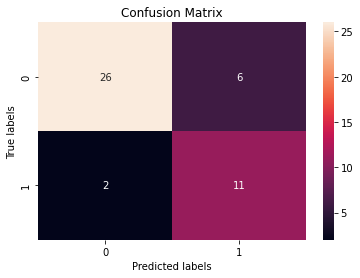

In [ ]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In order to deal with *imbalanced data*, we can look at the following:


*   True Positive  (TP)
*   True Negative  (TN)
*   False Positive (FP)
*   False Negative (FN).

Based on the above classes, the following can be defined:
$$Sensitivity = \frac{TP}{TP + FN}$$
$$Specificity = \frac{TN}{FP + TN}$$
$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F-Measure = 2\frac{Precision\times Recall}{Precision + Recall}$$

Note: All the expressions are based on the existence of a positive class and a negative class.






In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_test_predicted) #class-wise evaluation of the metrics.

(array([0.92857143, 0.64705882]),
 array([0.8125    , 0.84615385]),
 array([0.86666667, 0.73333333]),
 array([32, 13]))